# Prediksi Nilai Limit Kredit Revolving
menggunakan Deep Neural Network Regression

<br>Response Variable: **total_rev_hi_lim**

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Cleaning

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/loan_data_2007_2014.csv')
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [3]:
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='all', axis=1, inplace=True)
df.dropna(subset=['total_rev_hi_lim'], inplace=True)

In [4]:
unnec_cols = ['Unnamed: 0', 'id', 'member_id']

for i in df.columns:
    if i in unnec_cols:
        df.drop(columns=[i], inplace=True)
    else:
        continue

In [5]:
print('COL_NAME -------- NUM_OF_UNIQUE_VALUES\n')

for i in df.columns:
    if df[i].dtype == 'object':
        print('{} -------- {}'.format(i, df[i].unique().size))
    else:
        continue

COL_NAME -------- NUM_OF_UNIQUE_VALUES

term -------- 2
grade -------- 7
sub_grade -------- 35
emp_title -------- 166290
emp_length -------- 12
home_ownership -------- 6
verification_status -------- 3
issue_d -------- 29
loan_status -------- 7
pymnt_plan -------- 2
url -------- 396009
desc -------- 78409
purpose -------- 13
title -------- 39054
zip_code -------- 874
addr_state -------- 50
earliest_cr_line -------- 658
initial_list_status -------- 2
last_pymnt_d -------- 42
next_pymnt_d -------- 4
last_credit_pull_d -------- 43
application_type -------- 1


In [6]:
print('COL_NAME -------- NUM_OF_UNIQUE_VALUES\n')

for i in df.columns:
    if df[i].dtype == 'object':
        print('{} -------- {}'.format(i, df[i].unique().size))
    else:
        continue

COL_NAME -------- NUM_OF_UNIQUE_VALUES

term -------- 2
grade -------- 7
sub_grade -------- 35
emp_title -------- 166290
emp_length -------- 12
home_ownership -------- 6
verification_status -------- 3
issue_d -------- 29
loan_status -------- 7
pymnt_plan -------- 2
url -------- 396009
desc -------- 78409
purpose -------- 13
title -------- 39054
zip_code -------- 874
addr_state -------- 50
earliest_cr_line -------- 658
initial_list_status -------- 2
last_pymnt_d -------- 42
next_pymnt_d -------- 4
last_credit_pull_d -------- 43
application_type -------- 1


In [7]:
unnec_cols_2 = ['emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 
                'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']

for i in df.columns:
    if i in unnec_cols_2:
        df.drop(columns=[i], inplace=True)
    else:
        continue

In [8]:
fill_with_zero = ['delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 
                  'pub_rec', 'total_acc', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']
fill_with_mean = ['annual_inc', 'revol_util', 'collections_12_mths_ex_med']

for i in df.columns:
    if i in fill_with_zero:
        df[i].fillna(value=0, inplace=True)
    elif i in fill_with_mean:
        df[i].fillna(value=df[i].mean(), inplace=True)
    else:
        continue

In [9]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(value=df[i].mode(), inplace=True)
    else:
        continue

In [10]:
df.isna().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     18947
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
i

In [11]:
df['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [12]:
str_data = ['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years', 
            '5 years', '6 years', '9 years', '8 years', '< 1 year']

for i in df['emp_length']:
    if i in str_data:
        if i == '10+ years':
            df['emp_length'].replace(i, float(i.strip('+ years')), inplace=True)
        elif i == '1 year':
            df['emp_length'].replace(i, float(i.strip(' year')), inplace=True)
        elif i == '< 1 year':
            df['emp_length'].replace(i, i.strip('< '), inplace=True)
        else:
            df['emp_length'].replace(i, float(i.strip(' years')), inplace=True)
    else:
        continue

for i in df['emp_length']:
    if i == '1 year':
        df['emp_length'].replace(i, float(i.strip(' year')), inplace=True)
    else:
        continue

df['emp_length'].head()

42535    10.0
42536     1.0
42537    10.0
42538    10.0
42539     2.0
Name: emp_length, dtype: float64

In [13]:
df['emp_length'].fillna(value=df['emp_length'].mean(), inplace=True)
df.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymn

In [14]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('{} ------- {}'.format(i, len(df[i].unique())))
    else:
        continue

term ------- 2
grade ------- 7
sub_grade ------- 35
home_ownership ------- 6
verification_status ------- 3
issue_d ------- 29
loan_status ------- 7
pymnt_plan ------- 2
purpose ------- 13
addr_state ------- 50
initial_list_status ------- 2


In [15]:
unnec_cols_3 = ['sub_grade', 'issue_d', 'addr_state']
df.drop(columns=unnec_cols_3, inplace=True)

for i in df.columns:
    if df[i].dtype == 'object':
        print('{} ------- {}'.format(i, len(df[i].unique())))
    else:
        continue

term ------- 2
grade ------- 7
home_ownership ------- 6
verification_status ------- 3
loan_status ------- 7
pymnt_plan ------- 2
purpose ------- 13
initial_list_status ------- 2


In [16]:
df1 = pd.get_dummies(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396009 entries, 42535 to 466284
Data columns (total 76 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396009 non-null  int64  
 1   funded_amnt                          396009 non-null  int64  
 2   funded_amnt_inv                      396009 non-null  float64
 3   int_rate                             396009 non-null  float64
 4   installment                          396009 non-null  float64
 5   emp_length                           396009 non-null  float64
 6   annual_inc                           396009 non-null  float64
 7   dti                                  396009 non-null  float64
 8   delinq_2yrs                          396009 non-null  float64
 9   inq_last_6mths                       396009 non-null  float64
 10  mths_since_last_delinq               396009 non-null  float64
 11  mths_sinc

In [17]:
df_numerical = df1.copy()
for i in df_numerical.columns:
    if df_numerical[i].dtype == 'uint8':
        df_numerical.drop(columns=[i], inplace=True)
    else:
        continue

df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396009 entries, 42535 to 466284
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    396009 non-null  int64  
 1   funded_amnt                  396009 non-null  int64  
 2   funded_amnt_inv              396009 non-null  float64
 3   int_rate                     396009 non-null  float64
 4   installment                  396009 non-null  float64
 5   emp_length                   396009 non-null  float64
 6   annual_inc                   396009 non-null  float64
 7   dti                          396009 non-null  float64
 8   delinq_2yrs                  396009 non-null  float64
 9   inq_last_6mths               396009 non-null  float64
 10  mths_since_last_delinq       396009 non-null  float64
 11  mths_since_last_record       396009 non-null  float64
 12  open_acc                     396009 non-null  float64


In [18]:
df_numerical.corrwith(df['total_rev_hi_lim'], method='pearson')

loan_amnt                      0.290208
funded_amnt                    0.290206
funded_amnt_inv                0.290185
int_rate                      -0.146838
installment                    0.270074
emp_length                     0.068021
annual_inc                     0.291955
dti                            0.060972
delinq_2yrs                   -0.035028
inq_last_6mths                 0.008383
mths_since_last_delinq        -0.074946
mths_since_last_record        -0.113598
open_acc                       0.290747
pub_rec                       -0.095906
revol_bal                      0.809930
revol_util                    -0.125419
total_acc                      0.232194
out_prncp                      0.149447
out_prncp_inv                  0.149438
total_pymnt                    0.211101
total_pymnt_inv                0.211101
total_rec_prncp                0.201842
total_rec_int                  0.120626
total_rec_late_fee            -0.003501
recoveries                     0.006407


In [19]:
def col_corr(column):
    return df_numerical.corrwith(df['total_rev_hi_lim'], method='pearson')[column]

for i in df_numerical.columns:
    if col_corr(i) < 0.05 and col_corr(i) > -0.05:
        df1.drop(columns=[i], inplace=True)
    else:
        continue

df1.drop(columns=['policy_code'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396009 entries, 42535 to 466284
Data columns (total 67 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396009 non-null  int64  
 1   funded_amnt                          396009 non-null  int64  
 2   funded_amnt_inv                      396009 non-null  float64
 3   int_rate                             396009 non-null  float64
 4   installment                          396009 non-null  float64
 5   emp_length                           396009 non-null  float64
 6   annual_inc                           396009 non-null  float64
 7   dti                                  396009 non-null  float64
 8   mths_since_last_delinq               396009 non-null  float64
 9   mths_since_last_record               396009 non-null  float64
 10  open_acc                             396009 non-null  float64
 11  pub_rec  

In [20]:
df2 = df1.astype('float')

scaler = StandardScaler(copy=False)
scaler.fit_transform(df2)

X = df2.drop(columns=['total_rev_hi_lim']).values
y = df2['total_rev_hi_lim'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# DNN Model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(66,), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

In [22]:
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4288      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

# Training dan Evaluasi Model

In [23]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
8663/8663 [==============================] - 31s 3ms/step - loss: 0.4404 - val_loss: 0.1492
Epoch 2/50
8663/8663 [==============================] - 28s 3ms/step - loss: 0.3648 - val_loss: 0.1074
Epoch 3/50
8663/8663 [==============================] - 27s 3ms/step - loss: 0.3513 - val_loss: 0.1851
Epoch 4/50
8663/8663 [==============================] - 27s 3ms/step - loss: 0.3801 - val_loss: 0.2150
Epoch 5/50
8663/8663 [==============================] - 28s 3ms/step - loss: 0.3322 - val_loss: 0.3557
Epoch 6/50
8663/8663 [==============================] - 27s 3ms/step - loss: 0.4121 - val_loss: 0.5137
Epoch 7/50
8663/8663 [==============================] - 27s 3ms/step - loss: 0.2730 - val_loss: 1.2757
Epoch 8/50
8663/8663 [==============================] - 26s 3ms/step - loss: 0.3370 - val_loss: 0.2095
Epoch 9/50
8663/8663 [==============================] - 27s 3ms/step - loss: 0.3303 - val_loss: 0.3580
Epoch 10/50
8663/8663 [==============================] - 28s 3ms/step - l

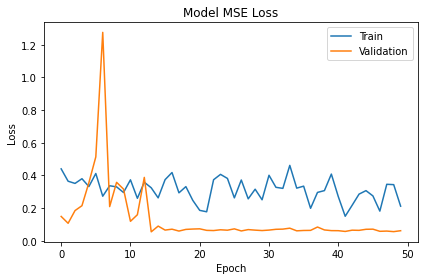

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [26]:
model.save(r'/content/drive/MyDrive/ML Model/idx_partners_intern_project.h5')

# Korelasi antar variabel numerik

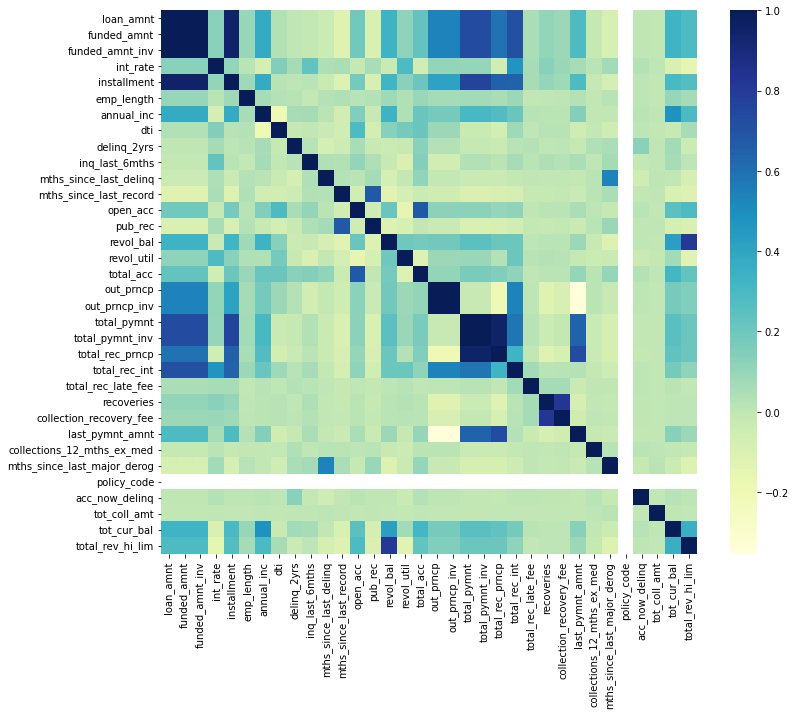

In [38]:
import seaborn as sns
%matplotlib inline

correlation = df_numerical.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation, cmap="YlGnBu", xticklabels=True, yticklabels=True, annot=False)
plt.savefig(r'/content/drive/MyDrive/ML Model/corr_matrix_idx_project.png', dpi=300, bbox_inches='tight')